# Fake News Detection Model


The authenticity of Information has become a longstanding issue affecting businesses and society, both for printed and digital media. On social networks, the reach and effects of information spread occur at such a fast pace and so amplified that distorted, inaccurate, or false information acquires a tremendous potential to cause real-world impacts, within minutes, for millions of users. Recently, several public concerns about this problem and some approaches to mitigate the problem were expressed.

1. Encode labels
2. Convert all uppern case in lower case
3. Remove Punctuation
4. Remove stopwords
5. Check Stats of Masseges
6. Convert all text into vectors
7. Imort classifier
8. Train and Test
9. Check the acuracy

In [1]:
# import Liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
News = pd.read_csv("train_news.csv")
News.head(10)

,Unnamed: 0,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1
5,5,3196,Whatever the Outcome on November 8th the US Wi...,NaN,Taming the corporate media beast Whatever the ...,1
6,6,5134,Rapid Evolution Saved This Fish From Pollution...,JoAnna Klein,The State of New Jersey says you can’t eat the...,0
7,7,1504,Alabama Prison Officials Retaliate Against Pri...,Brian Sonenstein,Advocates say prison officials at the Kilby Co...,1
8,8,13559,NaN,steventexas,People have made up their minds on president.\...,1
9,9,4203,Can We Live in a Constant State of Love?,Gillian,Leave a reply \nToni Emerson – When we fall in...,1


In [3]:
News.drop(columns = ["Unnamed: 0","id","written_by"],axis = 1, inplace = True)

In [4]:
News.shape

(20800, 3)

In [5]:
News.label.value_counts()

1    10413
0    10387
Name: label, dtype: int64

In [6]:
New_news=News.dropna()

In [7]:
messages=New_news.copy()

In [8]:
New_news.reset_index(inplace=True)

In [9]:
New_news.shape

(20203, 4)

In [10]:
New_news.head(10)

,index,headline,news,label
0,0,Ethics Questions Dogged Agriculture Nominee as...,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,Cotton to House: ’Do Not Walk the Plank and Vo...,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,"Paul LePage, Besieged Maine Governor, Sends Co...","AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,A Digital 9/11 If Trump Wins,Finian Cunningham has written extensively on...,1
5,5,Whatever the Outcome on November 8th the US Wi...,Taming the corporate media beast Whatever the ...,1
6,6,Rapid Evolution Saved This Fish From Pollution...,The State of New Jersey says you can’t eat the...,0
7,7,Alabama Prison Officials Retaliate Against Pri...,Advocates say prison officials at the Kilby Co...,1
8,9,Can We Live in a Constant State of Love?,Leave a reply \nToni Emerson – When we fall in...,1
9,10,Is Hillary a Closet Drunk… New WikiLeak Email ...,BREAKING: Clinton Fixer Reveals Sick Smear Hil...,1


In [11]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [12]:
New_news["news"][0]

'WASHINGTON  —   In Sonny Perdue’s telling, Georgians were growing weary of the corruption and scandals in their state when he took over as governor in 2003  —   a time when he gave his own version of a “drain the swamp” pledge. “My first goal as governor is to restore public trust in state government by changing the culture of state government,” Mr. Perdue told a leadership conference at Kennesaw State University in April 2003. “Our form of government depends on a mutual bond of trust between the people and their government. But people have become cynical about their government. ” But Mr. Perdue, a Republican who is awaiting confirmation to serve as President Trump’s agriculture secretary, became a target of frequent criticism that he was failing to honor his own ethics pledge during his eight years as governor. The criticism centers on the fact that, as Mr. Trump has, he continued to own or help run his family business ventures  —   four   companies  —   while serving as governor. Mr

In [13]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []
for i in range(0, len(New_news)):
    review = re.sub('[^a-zA-Z]', ' ', New_news['headline'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [14]:
corpus[0]

'ethic question dog agricultur nomine georgia governor new york time'

In [15]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus1 = []
for i in range(0, len(New_news)):
    review = re.sub('[^a-zA-Z]', ' ', New_news['news'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus1.append(review)

In [16]:
corpus1

['washington sonni perdu tell georgian grow weari corrupt scandal state took governor time gave version drain swamp pledg first goal governor restor public trust state govern chang cultur state govern mr perdu told leadership confer kennesaw state univers april form govern depend mutual bond trust peopl govern peopl becom cynic govern mr perdu republican await confirm serv presid trump agricultur secretari becam target frequent critic fail honor ethic pledg eight year governor critic center fact mr trump continu help run famili busi ventur four compani serv governor mr perdu one last cabinet member await senat confirm date set confirm hear holdup releas paperwork accompani nomin feder offic govern ethic blame delay offic must examin mr perdu propos avoid conflict interest run u depart known may includ sell farm asset tenur governor end complaint file mr perdu state ethic commiss two occas rule governor violat state ethic law commiss took unusu step fine mr perdu governor numer question

In [17]:
## Get the Independent features
X=New_news.drop(['label','index'],axis=1)

In [18]:
## Get the Dependent features
y=New_news['label']

In [19]:
X.shape

(20203, 2)

In [20]:
y.shape

(20203,)

In [21]:
## Applying Countvectorizer
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [22]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [23]:
cv.get_feature_names()

['aaron',
 'ab',
 'abandon',
 'abandon new',
 'abba',
 'abc',
 'abc news',
 'abduct',
 'abduct ring',
 'abduct ring expos',
 'abe',
 'abedin',
 'abedin email',
 'abedin weiner',
 'abl',
 'aboard',
 'abolish',
 'abort',
 'abort law',
 'abort new',
 'abort new york',
 'abram',
 'abroad',
 'abroad new',
 'abroad new york',
 'absolut',
 'abstain',
 'abstain un',
 'abstain un vote',
 'absurd',
 'abu',
 'abus',
 'abus new',
 'abus new york',
 'abus power',
 'aca',
 'academ',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest',
 'accid',
 'accident',
 'accident post',
 'accident post elect',
 'accomplic',
 'accord',
 'account',
 'accur',
 'accus',
 'accus fbi',
 'accus rape',
 'accus trump',
 'achiev',
 'acid',
 'acknowledg',
 'acknowledg emf',
 'acknowledg emf damag',
 'aclu',
 'acosta',
 'acquir',
 'acquit',
 'acquit malheur',
 'acquit malheur wildlif',
 'acquitt',
 'acr',
 'across',
 'across countri',
 'act',
 'act breitbart',
 'act like',
 'act new',
 'act new y

In [24]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 10000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [25]:
count_News = pd.DataFrame(X_train, columns=cv.get_feature_names())

In [26]:
count_News.head(10)

,aaron,ab,abandon,abandon new,abba,abc,abc news,abduct,abduct ring,abduct ring expos,...,zionist,zone,zone declar,zone declar militar,zone new,zone new york,zone two place,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
import matplotlib.pyplot as plt

In [28]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [29]:
plt.show()

# MultinomialNB Algorithm

In [30]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [31]:
from sklearn import metrics
from sklearn.metrics import classification_report
import itertools


accuracy:   0.90460477
Confusion matrix, without normalization


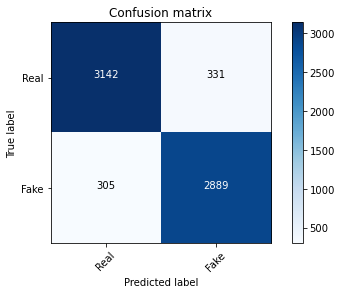

In [92]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.8f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['Real', 'Fake'])

In [33]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy score = ",score)
print("classification_report is \n ",classification_report(y_test,pred))

accuracy score =  0.9046047697615119
classification_report is 
                precision    recall  f1-score   support

           0       0.91      0.90      0.91      3473
           1       0.90      0.90      0.90      3194

    accuracy                           0.90      6667
   macro avg       0.90      0.90      0.90      6667
weighted avg       0.90      0.90      0.90      6667



# SVC(Support Vector Classification).

In [34]:
from sklearn.svm import SVC

In [35]:
svc =SVC()

In [36]:
svc.fit(X_train,y_train)

SVC()

In [37]:
svc.score(X_train,y_train)

0.9756944444444444

In [38]:
predsvc = svc.predict(X_test)

In [50]:
score = metrics.accuracy_score(y_test, pred)
score

0.9046047697615119

In [43]:
print("classification_report is \n ",classification_report(y_test,predsvc))

classification_report is 
                precision    recall  f1-score   support

           0       0.99      0.87      0.93      3473
           1       0.87      0.99      0.93      3194

    accuracy                           0.93      6667
   macro avg       0.93      0.93      0.93      6667
weighted avg       0.94      0.93      0.93      6667



In [51]:
sv = metrics.confusion_matrix(y_test, predsvc)
sv

array([[3018,  455],
       [  26, 3168]], dtype=int64)

Confusion matrix, without normalization


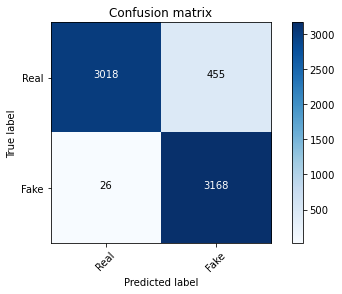

In [93]:
plot_confusion_matrix(sv, classes=['Real', 'Fake'])

# Decision Tree Classifier

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
dtc = DecisionTreeClassifier()

In [55]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [56]:
dtc.score(X_train,y_train)

1.0

In [57]:
preddtc = dtc.predict(X_test)

In [58]:
preddtc

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [60]:
score = metrics.accuracy_score(y_test, preddtc)
score

0.9178041097945103

In [61]:
print("classification_report is \n ",classification_report(y_test,preddtc))

classification_report is 
                precision    recall  f1-score   support

           0       0.93      0.91      0.92      3473
           1       0.90      0.93      0.92      3194

    accuracy                           0.92      6667
   macro avg       0.92      0.92      0.92      6667
weighted avg       0.92      0.92      0.92      6667



In [64]:
dt = metrics.confusion_matrix(y_test, preddtc)
dt

array([[3158,  315],
       [ 233, 2961]], dtype=int64)

Confusion matrix, without normalization


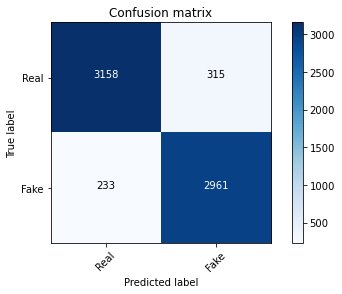

In [94]:
plot_confusion_matrix(dt, classes=['Real', 'Fake'])

# KNeighborsClassifier

In [66]:
from sklearn.neighbors import KNeighborsClassifier

In [68]:
knc = KNeighborsClassifier()

In [69]:
knc.fit(X_train,y_train)

KNeighborsClassifier()

In [70]:
knc.score(X_train,y_train)

0.8164154846335697

In [71]:
predknc = knc.predict(X_test)

In [72]:
predknc

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [73]:
score = metrics.accuracy_score(y_test, predknc)
score

0.7946602669866507

In [74]:
print("classification_report is \n ",classification_report(y_test,predknc))

classification_report is 
                precision    recall  f1-score   support

           0       1.00      0.61      0.76      3473
           1       0.70      1.00      0.82      3194

    accuracy                           0.79      6667
   macro avg       0.85      0.80      0.79      6667
weighted avg       0.86      0.79      0.79      6667



Confusion matrix, without normalization


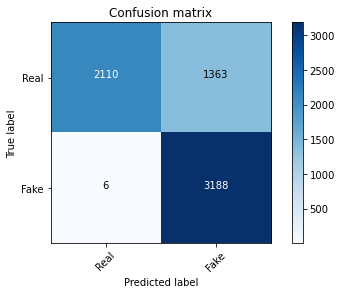

In [95]:
Kn = metrics.confusion_matrix(y_test, predknc)
plot_confusion_matrix(Kn, classes=['Real', 'Fake'])

In [77]:
feature_names = cv.get_feature_names()

In [78]:
classifier.coef_[0]

array([-11.1080202 , -10.00940791,  -9.02857866, ..., -10.00940791,
        -9.16211005,  -9.72172584])

In [86]:
svc.support_vectors_


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [87]:
sorted(zip(classifier.coef_[0], feature_names), reverse=True)

[(-4.199265420805357, 'trump'),
 (-4.5583694578867675, 'hillari'),
 (-4.626443070844147, 'clinton'),
 (-5.096753025716416, 'elect'),
 (-5.42784759110351, 'new'),
 (-5.448537984360956, 'us'),
 (-5.586559282258332, 'video'),
 (-5.665602489598784, 'fbi'),
 (-5.669940891197382, 'war'),
 (-5.669940891197382, 'comment'),
 (-5.674298196566338, 'russia'),
 (-5.678674571166137, 'news'),
 (-5.737382171992915, 'email'),
 (-5.746728034411152, 'america'),
 (-5.751433925448565, 'hillari clinton'),
 (-5.804715292061502, 'world'),
 (-5.804715292061502, 'vote'),
 (-5.829905540890061, 'obama'),
 (-5.909523168854752, 'donald'),
 (-5.960525723307125, 'donald trump'),
 (-6.090740363305653, 'say'),
 (-6.145175569860671, 'break'),
 (-6.145175569860671, 'american'),
 (-6.159260309742409, 'day'),
 (-6.173546266989886, 'presid'),
 (-6.180766514963373, 'state'),
 (-6.279706462818276, 'wikileak'),
 (-6.287738634515541, 'de'),
 (-6.303999155387321, 'report'),
 (-6.312229654523836, 'support'),
 (-6.328896707009048,

In [88]:
sorted(zip(classifier.coef_[0], feature_names))

[(-11.108020200120578, 'aaron'),
 (-11.108020200120578, 'abandon new'),
 (-11.108020200120578, 'abe'),
 (-11.108020200120578, 'aboard'),
 (-11.108020200120578, 'abort law'),
 (-11.108020200120578, 'abort new'),
 (-11.108020200120578, 'abort new york'),
 (-11.108020200120578, 'abroad'),
 (-11.108020200120578, 'abroad new'),
 (-11.108020200120578, 'abroad new york'),
 (-11.108020200120578, 'abus new'),
 (-11.108020200120578, 'abus new york'),
 (-11.108020200120578, 'academ'),
 (-11.108020200120578, 'academi'),
 (-11.108020200120578, 'accus rape'),
 (-11.108020200120578, 'acosta'),
 (-11.108020200120578, 'acquir'),
 (-11.108020200120578, 'act breitbart'),
 (-11.108020200120578, 'act new'),
 (-11.108020200120578, 'act new york'),
 (-11.108020200120578, 'activ tb'),
 (-11.108020200120578, 'ad new'),
 (-11.108020200120578, 'ad new york'),
 (-11.108020200120578, 'address breitbart'),
 (-11.108020200120578, 'administr breitbart'),
 (-11.108020200120578, 'administr new'),
 (-11.108020200120578,

In [101]:
News1 = pd.read_csv("train_news.csv")
News1.head(10)

,Unnamed: 0,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1
5,5,3196,Whatever the Outcome on November 8th the US Wi...,NaN,Taming the corporate media beast Whatever the ...,1
6,6,5134,Rapid Evolution Saved This Fish From Pollution...,JoAnna Klein,The State of New Jersey says you can’t eat the...,0
7,7,1504,Alabama Prison Officials Retaliate Against Pri...,Brian Sonenstein,Advocates say prison officials at the Kilby Co...,1
8,8,13559,NaN,steventexas,People have made up their minds on president.\...,1
9,9,4203,Can We Live in a Constant State of Love?,Gillian,Leave a reply \nToni Emerson – When we fall in...,1


In [102]:
News1.drop(columns = ["Unnamed: 0","id"],axis = 1, inplace = True)

In [103]:
News1.shape

(20800, 4)

In [104]:
df1=News1.dropna()

In [105]:
df=df1.copy()

In [106]:
df.reset_index(inplace=True)

In [107]:
df.shape

(18285, 5)

In [108]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [109]:
df["news"][0]

'WASHINGTON  —   In Sonny Perdue’s telling, Georgians were growing weary of the corruption and scandals in their state when he took over as governor in 2003  —   a time when he gave his own version of a “drain the swamp” pledge. “My first goal as governor is to restore public trust in state government by changing the culture of state government,” Mr. Perdue told a leadership conference at Kennesaw State University in April 2003. “Our form of government depends on a mutual bond of trust between the people and their government. But people have become cynical about their government. ” But Mr. Perdue, a Republican who is awaiting confirmation to serve as President Trump’s agriculture secretary, became a target of frequent criticism that he was failing to honor his own ethics pledge during his eight years as governor. The criticism centers on the fact that, as Mr. Trump has, he continued to own or help run his family business ventures  —   four   companies  —   while serving as governor. Mr

In [112]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['news'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [120]:
x=df.drop('label',axis=1)

In [121]:
Y=df['label']

In [ ]:
## TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
x=tfidf_v.fit_transform(corpus).toarray()

In [ ]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.33, random_state=0)

In [ ]:
tfidf_v.get_feature_names()

In [ ]:
tfidf_v.get_params()

In [ ]:
count_df = pd.DataFrame(x_train, columns=tfidf_v.get_feature_names())

# Multinomial Naive Bayes

In [ ]:
mnb=MultinomialNB()

In [ ]:
mnb.fit(X_train, y_train)
predmnb = mnb.predict(X_test)
scoremnb = metrics.accuracy_score(y_test, predmnb)
cmmnb = metrics.confusion_matrix(y_test, predmnb)
print("accuracy:   %0.8f" ,scoremnb)
print("classification_report is \n ",classification_report(y_test,predmnb))
print("Confusion Matrix",cmmnb)
plot_confusion_matrix(cmmnb, classes=['Real', 'Fake'])

# SVC(Support Vector Classifier)

In [ ]:
svctf =SVC()
svctf.fit(X_train,y_train)
predsvc2 = svctf.predict(X_test)
scoresvc2 = metrics.accuracy_score(y_test, predsvc2)
cmsvc2 = metrics.confusion_matrix(y_test, predsvc2)
print("accuracy:   %0.8f" ,scoresvc2)
print("classification_report is \n ",classification_report(y_test,predsvc2))
print("Confusion Matrix",cmsvc2)
plot_confusion_matrix(cmsvc2, classes=['Real', 'Fake'])

# Decision Tree Classifier

In [ ]:
dtctf = DecisionTreeClassifier()
dtctf.fit(X_train,y_train)
preddtc2 = dtctf.predict(X_test)
scoredtc2 = metrics.accuracy_score(y_test, preddtc2)
cmdtc2 = metrics.confusion_matrix(y_test, preddtc2)
print("accuracy:   %0.8f" ,scoredtc2)
print("classification_report is \n ",classification_report(y_test,preddtc2))
print("Confusion Matrix",cmdtc2)
plot_confusion_matrix(cmdtc2, classes=['Real', 'Fake'])

# KNeighborsClassifier


In [ ]:
knc2 = KNeighborsClassifier()
knc2.fit(X_train,y_train)
predknc2 = knc2.predict(X_test)
scoreknc2 = metrics.accuracy_score(y_test, predknc2)
cmknc2 = metrics.confusion_matrix(y_test, predknc2)
print("accuracy:   %0.8f" ,scoreknc2)
print("classification_report is \n ",classification_report(y_test,predknc2))
print("Confusion Matrix",cmknc2)
plot_confusion_matrix(cmknc2, classes=['Real', 'Fake'])